In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import astropy
import astropy.units as u
import corner
from astropy.cosmology import LambdaCDM

In [23]:
def Hz1(z1,H01,Om1,Ode1,Ok1):
    #cosmo =LambdaCDM(H0=H01* u.km / u.s / u.Mpc, Om0=Om1, Ode0=Ode1) 
    E =np.sqrt(Om1*((1+z1)**3) + Ok1*((1+z1)**2) + Ode1)
    #E=cosmo.efunc(z1)
    HZ1 = H01*E
    return HZ1

In [24]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01,2., num=num_zs)

In [25]:
O_m=0.3111
O_de=0.6889
H_0=67.66
O_k=-0.04

In [26]:
Hz=Hz1(zs,H_0,O_m,O_de,O_k)/(1+zs)

In [27]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [28]:
H_zz= Hz + e1

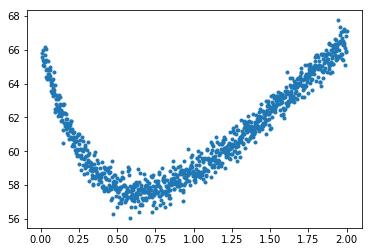

In [29]:
plt.plot(zs,H_zz, '.')

In [30]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('Ode1',0.7,True,0.,2.),
           ('Ok1',-0.04,True,-0.2,0.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['Ode1'],v['Ok1'])/(1+zs)-H_zz)/error_sigma

In [31]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 32
    # data points      = 1000
    # variables        = 4
    chi-square         = 1053.36346
    reduced chi-square = 1.05759383
    Akaike info crit   = 59.9883365
    Bayesian info crit = 79.6193576
[[Variables]]
    Om1:   0.25652632 +/- 165.004060 (64322.47%) (init = 0.3)
    H01:   74.5167801 +/- 23900.7613 (32074.33%) (init = 70)
    Ode1:  0.56794721 +/- 365.317681 (64322.47%) (init = 0.7)
    Ok1:  -0.03308839 +/- 21.2830958 (64321.95%) (init = -0.04)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, Ode1) =  1.000
    C(Om1, H01)  = -1.000
    C(H01, Ode1) = -1.000
    C(Ode1, Ok1) = -1.000
    C(Om1, Ok1)  = -1.000
    C(H01, Ok1)  =  1.000


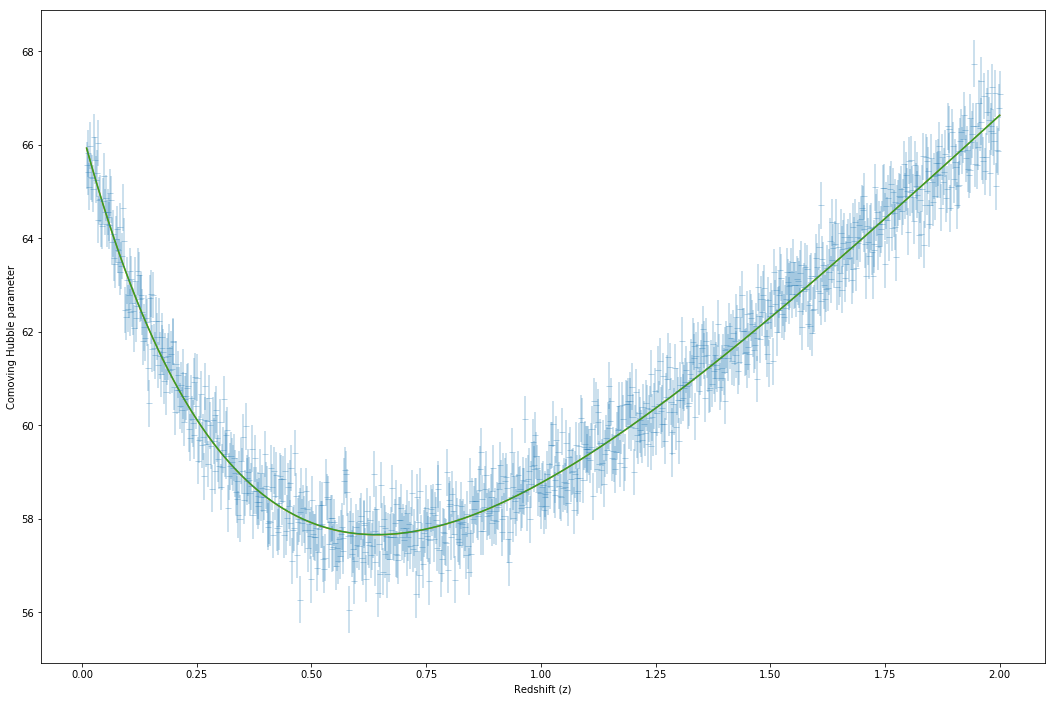

In [32]:
fig = plt.figure(figsize=(18,12))
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='_',alpha=0.3)
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestOde1 = mi.params.valuesdict()['Ode1']
bestOk1 =mi.params.valuesdict()['Ok1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestOde1,bestOk1)/(1+zs))
plt.plot(zs,Hz)
plt.xlabel('Redshift (z)')
plt.ylabel('Comoving Hubble parameter')
lmfit.report_fit(mi)

In [52]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500,thin=1,
                         params=p, is_weighted=True)

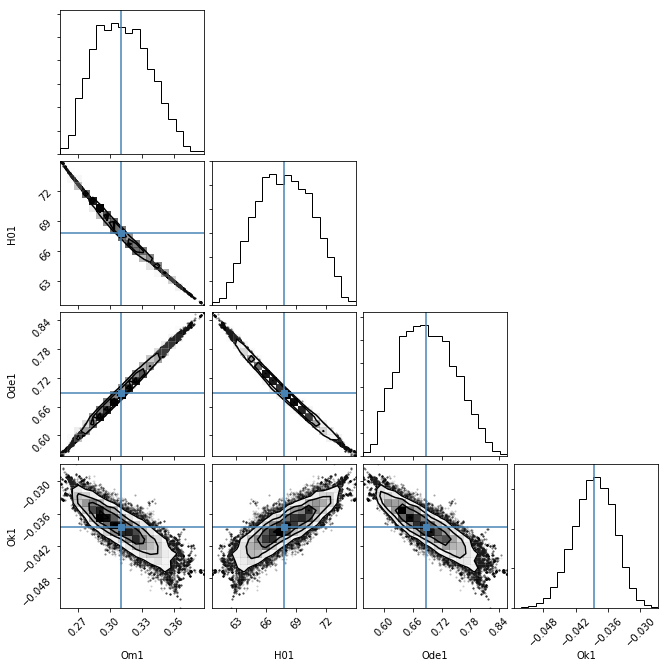

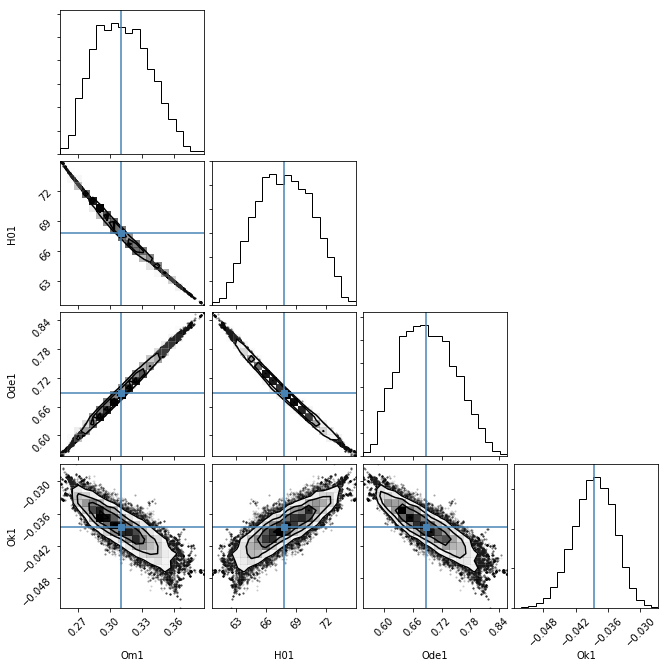

In [53]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))